<a href="https://colab.research.google.com/github/yarrib/fastai-projects-v2/blob/master/NB2_CheckAndPreprocessImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evaluate Images

In this notebook we will evaluate the images downloaded in NB1.

In [1]:
%%capture
!pip install fastai --upgrade
!pip install -Uqq fastbook

In [2]:
# imports and setup
import fastbook
fastbook.setup_book()

from fastai.vision.widgets import *
from fastai.vision.all import *
from fastbook import *
import os
!ls


gdrive	sample_data


<b>handling a peculiar issue with dependencies between colab default and fastbook/fastai</b>

https://forums.fast.ai/t/google-colab-pip-install-fastbook-produces-dependency-error-with-tornado-v6-1/94109

In [3]:
from google.colab import auth
auth.authenticate_user()

## Once the setup is complete we can proceed with evaluating the downloaded images


In [4]:
# set path to drive
path = Path('/content/gdrive/MyDrive/Colab Notebooks/fish')
display(path)

def get_species_dir(path):
  # get a list of the subdirs in the path - i.e. the fish species
  return next(os.walk(path))[1]
  
def get_img_list_for_species(subdir):
  return next(os.walk(Path(path,subdir)))[2]



# ok lets see the first few species dirs
species_dirs = get_species_dir(path=path)
display(species_dirs[:5])

# and lets see a few image paths in the first species dir
img_list_for_species_0 = get_img_list_for_species(species_dirs[0])
display(img_list_for_species_0[:5])

Path('/content/gdrive/MyDrive/Colab Notebooks/fish')

['common carp', 'channel catfish', 'saugeye', 'musky', 'crappie']

['00000005.jpg',
 '00000002.jpg',
 '00000004.jpg',
 '00000009.jpg',
 '00000000.jpg']

## Plot some image examples

 - look through the first few species via the directory names
 - plot a few images from each of the directories

/content/gdrive/MyDrive/Colab Notebooks/fish/common carp
/content/gdrive/MyDrive/Colab Notebooks/fish/channel catfish
/content/gdrive/MyDrive/Colab Notebooks/fish/saugeye
/content/gdrive/MyDrive/Colab Notebooks/fish/musky
/content/gdrive/MyDrive/Colab Notebooks/fish/crappie


<Figure size 432x288 with 0 Axes>

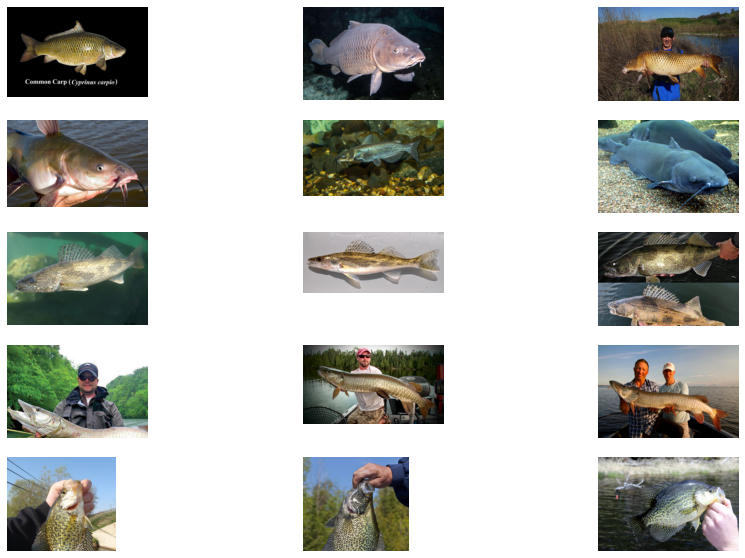

In [5]:
# now lets show the first few images in each of the first few directories
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# create fig and axes
plt.figure()
fig,ax = plt.subplots(5,3,sharex=True, sharey=True, figsize=(15,10))

for i,sd in enumerate(species_dirs[:5]): # only looking at the first few dirs
  print(Path(path,sd))
  img_list = get_img_list_for_species(sd)
  #print(img_list[:3])
  # display images
  for j in range(3):
    im = Image.open(Path(path,sd,img_list[j]))
    ax[i,j].imshow(im.to_thumb(256,256),)
    ax[i,j].axis('off')

## Now we need to do some data quality checks

In [6]:
# lets check for corrupt images
all_failed_images = []
for sd in species_dirs:
  # using the get_image_files function from fastai
  files = get_image_files(Path(path,sd))
  # again using a verify_images func to check which images cannot be opened
  failed = verify_images(files)
  print(f'{sd}: {len(failed)}')
  all_failed_images.append(failed)
  # remove the images
  failed.map(Path.unlink)

print(f'Num Bad Images: {len(all_failed_images)}')

common carp: 0
channel catfish: 0
saugeye: 0
musky: 0
crappie: 0
walleye: 0
northern pike: 0
bluegill: 0
sauger: 0
rohu: 0
catla: 0
mrigal carp: 0


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


mahseer: 0
hilsa: 0
pulasa fish: 0
kajuli ailia coila: 0
tilapia: 0
rani pink perch: 0
calbasu: 0
mystus tengara: 0
karimeen fish: 0
magur: 0
wallago attu: 0
pabda fish: 0
kokila garfish: 0
snakehead: 0
goonch catfish: 0
ganges shark: 0
ganges stingray: 0
indian river dolphin: 0
alligator gar: 0
american gizzard shad: 0
bigmouth buffalo: 0
blue catfish: 0
brook trout: 0
brown bullhead: 0
brown trout: 0
coho salmon: 0
eelpout: 0
freshwater drum: 0
king salmon: 0
largemouth bass: 0
longear sunfish: 0
longnose gar: 0
bowfin: 0
paddlefish: 0
pallid sturgeon: 0
yellow bullhead: 0
yellow perch: 0
pink salmon: 0
pumpkinseed: 0
redear sunfish: 0
river redhorse: 0
shorthead redhorse: 0
shovelnose sturgeon: 0
smallmouth bass: 0
rainbow trout: 0
white bass: 0
white sucker: 0
lake whitefish: 0
lake trout: 0
Num Bad Images: 61


In [8]:
# species count
print(f'Total Species in Image Data: {len(next(os.walk(path))[1])}')

# total images (raw)
num_images = 0
subdirs = next(os.walk(path))[1]
for d in subdirs:
  ll =len(next(os.walk(Path(path,d)))[2])
  num_images += ll
print(f'Total Images (raw): {num_images:,.0f}')

# pct good images
print(f'Bad Images: {61}\tBad Images as Percentage of Total: {(61/num_images)*100:,.2f}%')

Total Species in Image Data: 61
Total Images (raw): 7,692
Bad Images: 61	Bad Images as Percentage of Total: 0.79%


# Some interesting observations and manual data cleansings

Despite a low number of "Bad Images", many images needed to be removed manually. The total original number of images was about 9,160, so about 1500 images or invalid files were removed in a combination of automated and manual methods.

- Rock Bass is a species which seemed to turn up a lot of electric guitars, so the category was eliminated
- Another example, the Pulasa Fish and several other Indian species seem to be heavily biased towards images of curry dishes made with the fish, so the removal of those images reduced sample size for certain species
- Fish like the Lake Whitefish were confused with images of lakes, and images of fish with white meat, e.g. Walleye
- Some fish, like the Kokila Garfish, had so few results that generalization is probably going to be poor for that species
- Ganges Stingray happens to turn up a lot of images for corvette stingrays, instead of the ray.
- The Calbasu is another fish from India with limited valid images, but in a special way. Most of the image findings were image renderings of research papers regarding this fish as an important food source.
- Typically thought of as a baitfish in the US, the Gizzard Shad is a smaller fish which in images was often confused with shad style artifical lures, admittedly a common imitation bait.
- Weirdly enough, the Sauger - besides the common mix up with Walleyes, had many wet/dry vac images. there must be a brand name that clashes.

What these exceptions highlight in terms of data quality is the need for a human-in-the-loop. Certainly contextual knowledge is important given the variation in results here from web scraping the data.
